In [1]:
#Goal: Help customers find the best products by analyzing reviews for sentiment and providing personalized recommendations.

In [2]:
#Project: Build a machine learning pipeline to
#(a) predict customer sentiment/rating from review text, and
#(b) recommend products to users based on past behavior & product features.

In [3]:
#Do higher discounts correlate with higher ratings or more reviews?
#Compare average rating with average sentiment — do users’ words match the star ratings?
#Build a simple content-based recommender

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px
import plotly.graph_objects as go

In [6]:
data=pd.read_csv('amazon/amazon.csv')
data.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
data.shape

(1465, 16)

In [8]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [11]:
data=data.drop_duplicates()

In [12]:
data.duplicated(subset=['product_id']).sum()

114

In [13]:
data.duplicated(subset=['review_id']).sum()

271

In [14]:
data.shape

(1465, 16)

In [15]:
category=data['category'].str.split('|')
category=category.explode()
len(category.drop_duplicates())

317

In [16]:
#Data cleaning
#Removing ₹,%

In [17]:
data['actual_price']=(data['actual_price'].str.replace('₹', '', regex=True).str.replace(',','',regex=True).astype(float))
data['discounted_price']=(data['discounted_price'].str.replace('₹', '', regex=True).str.replace(',','',regex=True).astype(float))
data['discount_percentage']=(data['discount_percentage'].str.replace('%', '', regex=True).astype(float)) 

In [18]:
data['rating']=data['rating'].str.replace('|', '0', regex=False).astype(float)

In [19]:
data['rating_count']=(data['rating_count'].str.replace(',','',regex=True).astype(float))

In [20]:
data.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.093788,18295.541353
std,6944.304394,10874.826864,21.635905,0.310598,42753.864952
min,39.000000,39.000000,0.000000,0.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [21]:
#KNN uses similar rows (neighbors) to estimate the missing value.
#Keeps the distribution of the data more intact.
#Especially useful if data is not missing completely at random.
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer(n_neighbors=5)
col_impute=['rating','rating_count']
data[col_impute] = knn_imputer.fit_transform(data[col_impute])

In [22]:
#Do higher discounts correlate with higher ratings or more reviews?

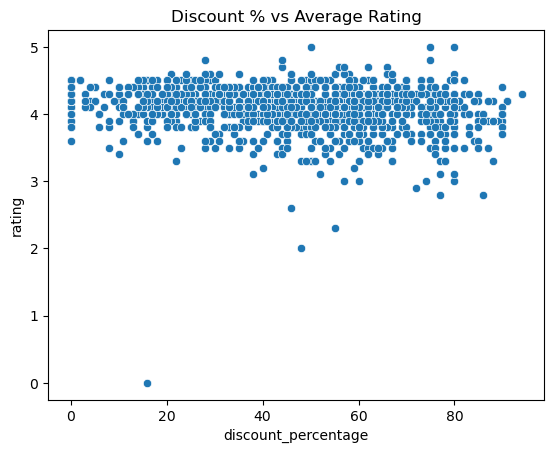

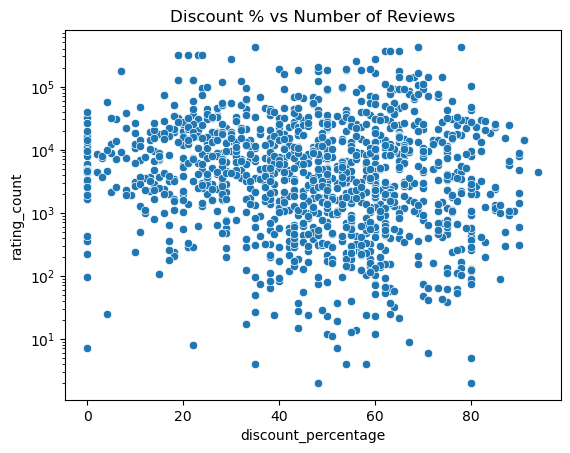

In [23]:
import seaborn as sns
sns.scatterplot(x='discount_percentage', y='rating', data=data)
plt.title("Discount % vs Average Rating")
plt.show()
sns.scatterplot(x='discount_percentage', y='rating_count', data=data)
plt.title("Discount % vs Number of Reviews")
plt.yscale('log')  # optional, if counts are skewed
plt.show()

In [24]:
print(data['discount_percentage'].corr(data['rating']))

-0.13255588435937216


In [25]:
#Negative correlation

In [26]:
data['discount_percentage'].corr(data['rating_count'])

0.011126643007055226

In [27]:
#Negligible

In [28]:
#Using Spearman coefficient
from scipy.stats import spearmanr
print(spearmanr(data['discount_percentage'], data['rating']))
print(spearmanr(data['discount_percentage'], data['rating_count']))

SignificanceResult(statistic=-0.14402499223646353, pvalue=3.080708503572326e-08)
SignificanceResult(statistic=-0.09702805687121693, pvalue=0.00019970573952416657)


In [29]:
#For discount_percentage vs rating: As discount increases, ratings slightly tend to go down — but the effect is small (correlation < 0.2). 
#{weak negative correlation, p value is very small which means statistically significant}

#For discount_percentage vs rating_count: Negligible

In [30]:
#To see the comments, category, etc. in full, we use the following comment.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [31]:
data.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,64.0,4.2,24269.0,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1

In [32]:
#Sentiment Analysis & Rating Prediction
#Product Price & Discount Analysis
#Recommendation System
#NLP: Topic Modeling on Reviews

In [33]:
data['user_id']=data['user_id'].astype(str)

In [34]:
data['product_id']=data['product_id'].astype(str)

In [35]:
#Identifying the top product category by combining rating and rating count 

In [36]:
top_prod=data.groupby(['category']).apply(lambda x:pd.Series({'total_rating_count':x['rating_count'].sum(),'weighted_rating':np.average(x['rating'],weights=x['rating_count'])}))

C:\Users\HP\AppData\Local\Temp\ipykernel_11856\2143974806.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_prod=data.groupby(['category']).apply(lambda x:pd.Series({'total_rating_count':x['rating_count'].sum(),'weighted_rating':np.average(x['rating'],weights=x['rating_count'])}))


In [37]:
top_prod["score"] = top_prod["weighted_rating"] * np.log1p(top_prod["total_rating_count"]) #composite score
#The composite score is to balance quality and popularity.
#We don’t want to recommend something that just has 3 reviews, even if the rating is 5.0 — because that’s statistically weak.
#So we adjust the score slightly downward if the number of ratings is low, or upward if it’s well-established.

top_categories = top_prod.sort_values("score", ascending=False).head(10)

In [38]:
# Bar graph to show the top 10 product category

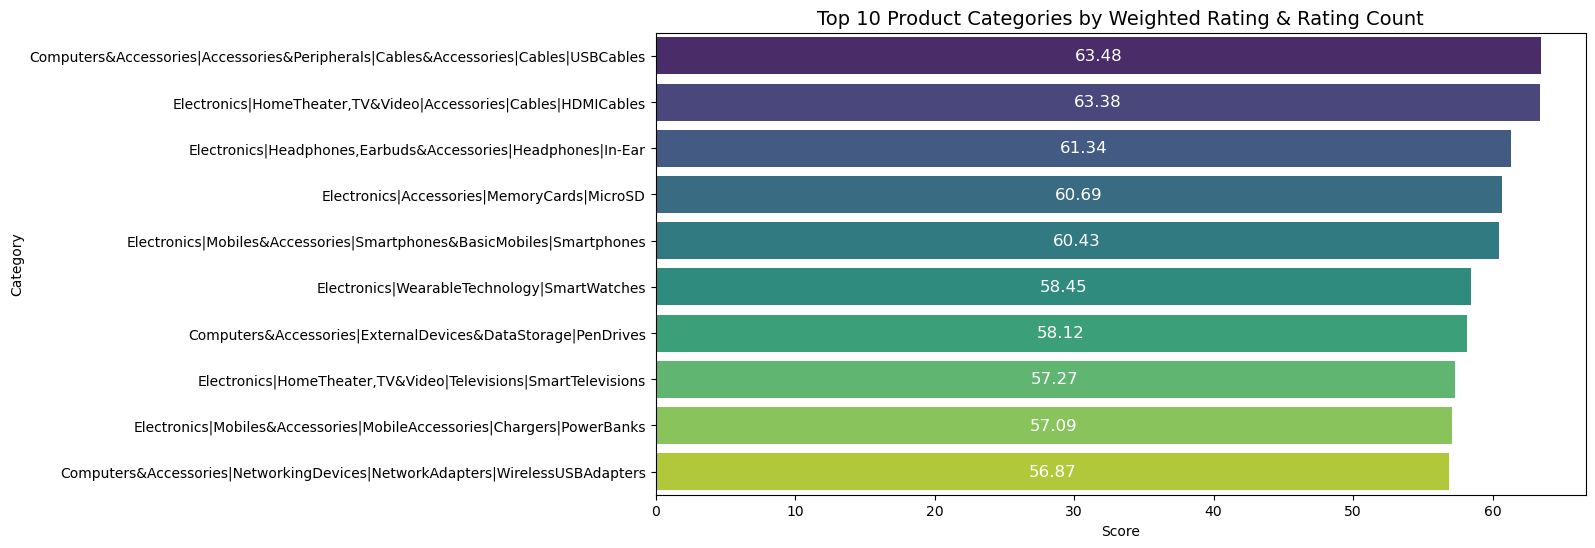

In [39]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='category',x='score',hue='category',data=top_categories,palette="viridis")
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f', label_type='center', fontsize=12,color='white')
plt.xlabel('Score')
plt.ylabel('Category')
plt.title("Top 10 Product Categories by Weighted Rating & Rating Count", fontsize=14)
plt.show();

In [40]:
#Top products by category

In [41]:
top_prod_by_cat=data.groupby(["category", "product_name"]).agg({"rating": lambda x: np.average(x, weights=data.loc[x.index, "rating_count"]), "rating_count": "sum"}).reset_index()

In [42]:
#Rank products within each category
top_prod_by_cat['rank']=top_prod_by_cat.groupby('category')['rating'].rank(method='first', ascending=False)

In [43]:
#Top product from each category
top_prod_per_cat=top_prod_by_cat[top_prod_by_cat['rank']==1].sort_values(by='rating', ascending=False)

In [44]:
top_prod_per_cat.head(5)

,category,product_name,rating,rating_count,rank
217,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice","Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0,23.0,1.0
109,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0,11564.6,1.0
1050,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8,28.0,1.0
960,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters","Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8,53803.0,1.0
1014,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8,3964.0,1.0


In [45]:
top_prod_per_cat['product_name']=top_prod_per_cat['product_name'].str.split(',').str[0]
top_prod_per_cat=top_prod_per_cat.head(10)

In [46]:
top_prod_per_cat['product_name']=top_prod_per_cat['product_name'].str.slice(0,120)+'...'

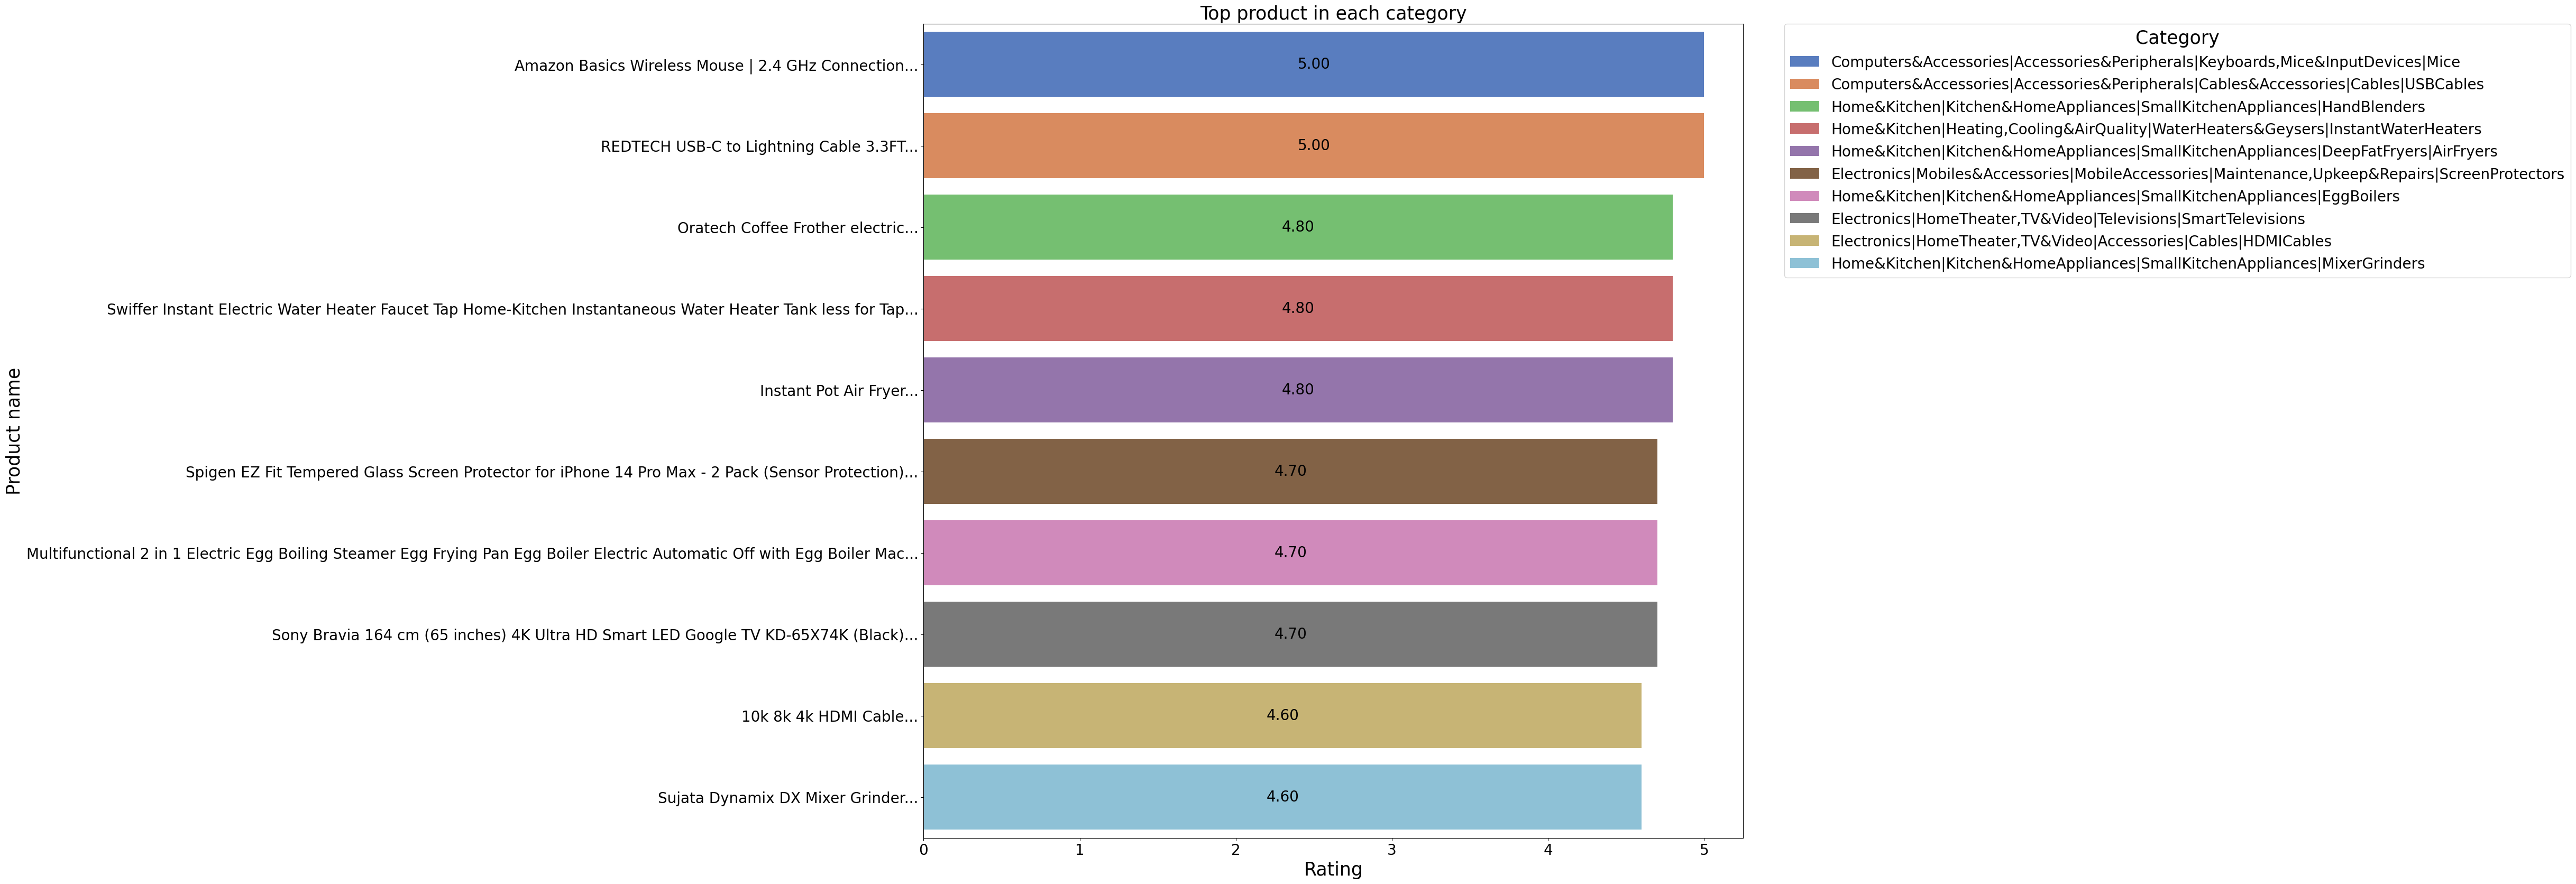

In [47]:
plt.figure(figsize=(20,20))
ax=sns.barplot(x='rating',y='product_name',hue='category',palette='muted',data=top_prod_per_cat)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f', label_type='center', fontsize=20)

plt.xlabel('Rating',fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('Product name',fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top product in each category',fontsize=25)
plt.legend(title='Category', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show();

In [48]:
#Sentiment analysis

In [49]:
#Label Sentiment from Ratings
def sentiment(rating):
    if rating>=4:
        return 'positive'
    elif rating<4 and rating>=3:
        return 'neutral'
    else:
        return 'negative'

data_senti=data
data_senti['sentiment']=data_senti['rating'].apply(sentiment)

In [50]:
#Plotting the Sentiment from Ratings
sentiment_count=data_senti['sentiment'].value_counts().reset_index()
sentiment_count.columns=['sentiment','count']

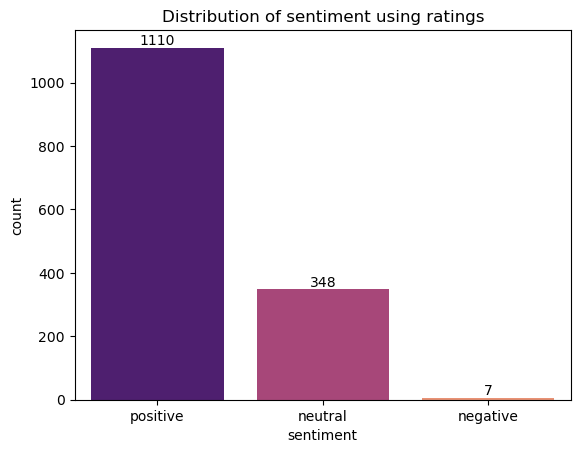

In [51]:
ax=sns.barplot(x='sentiment',y='count',hue='sentiment',data=sentiment_count,palette='magma')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Distribution of sentiment using ratings');

In [52]:
#Cleaning and preparing the text
import re
import string

data_senti['review']=data_senti['review_title'].fillna('')+' '+data_senti['review_content'].fillna('')
def clean_text(text):
    text=text.lower()
    text=re.sub(r'https?://\S+', '', text)  #For https
    text = re.sub(r'\d+', '', text) # For numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data_senti['clean_text'] = data_senti['review'].apply(clean_text)

In [53]:
!pip install wordcloud

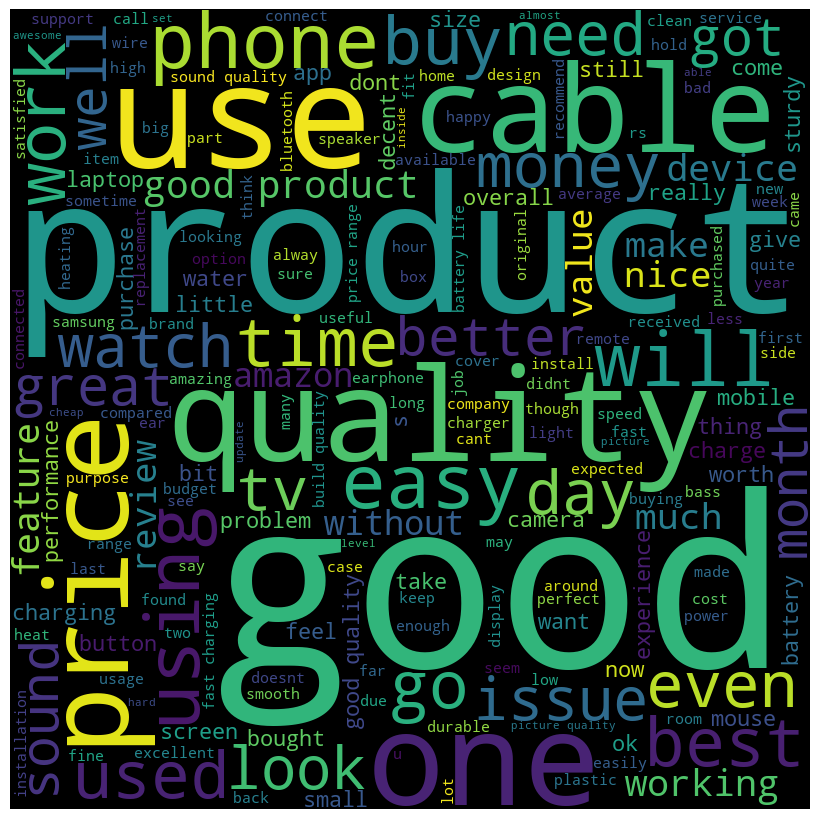

In [54]:
#word cloud
from wordcloud import WordCloud,STOPWORDS

reviews_text = ' '.join(data_senti['clean_text'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='BLACK', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [55]:
#Since the data is unbalanced, we are upsampling the data.
from sklearn.utils import resample

pos=data_senti[data_senti['sentiment']=='positive']
neu=data_senti[data_senti['sentiment']=='neutral']
neg=data_senti[data_senti['sentiment']=='negative']

neu_up=resample(neu,replace=True,n_samples=1110,random_state=42)
neg_up=resample(neg,replace=True,n_samples=1110,random_state=42)

In [56]:
balanced = pd.concat([pos,neu_up, neg_up]).sample(frac=1, random_state=42).reset_index(drop=True)

In [57]:
#Vectorising Cleaned text
#Because machine learning algorithms (like logistic regression, SVM, etc.) cannot process this directly — they need a numerical representation.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
# Tokenize text (split by spaces/punctuation) and provide stopword removal.
#TfidfVectorizer automatically splits text into words using its default tokenizer (based on spaces and punctuation).
X = vectorizer.fit_transform(balanced['clean_text'])
y = balanced['sentiment']

In [58]:
#Train Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [59]:
y_pred=model.predict(X_test)

In [60]:
from sklearn import metrics

In [61]:
print(metrics.accuracy_score(y_test, y_pred)) #Accuracy measures how often the model is correct.

0.9309309309309309


In [62]:
print(metrics.precision_score(y_test, y_pred, average='weighted')) #Of the positives predicted, what percentage is truly positive?

0.933058058058058


In [63]:
print(metrics.recall_score(y_test, y_pred, average='weighted'))  #Recall measures how good the model is at predicting positives.

0.9309309309309309


In [64]:
print(metrics.f1_score(y_test, y_pred, average='weighted')) 
#F-score is the "harmonic mean" of precision and sensitivity.
#It considers both false positive and false negative cases and is good for imbalanced datasets.

0.9307478209917234


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       231
     neutral       0.86      0.94      0.90       220
    positive       0.93      0.85      0.89       215

    accuracy                           0.93       666
   macro avg       0.93      0.93      0.93       666
weighted avg       0.93      0.93      0.93       666



In [66]:
#Macro F1-score = 0.91 : All classes are treated equally when calculating the F1 average — this is very good.
#Some confusion between neutral and positive reviews exists.
#Precision is 0.86 for neutral, the model sometimes predicts neutral when it shouldn't.
#Recall is 0.85 for positive, model failed to identify some positive reviews.

In [67]:
#Predicting Sentiment for Each Review on original data
data1=data
data1['review_text']=data1['review_title'].fillna('')+' '+data1['review_content'].fillna('')
data1['clean_text']=data1['review_text'].apply(clean_text)

In [68]:
X_all=vectorizer.transform(data1['clean_text'])
data1['predicted_sentiment']=model.predict(X_all)

In [69]:
data1=data1[['product_name','category','rating','rating_count','clean_text','predicted_sentiment']]
data1.head(2)

,product_name,category,rating,rating_count,clean_text,predicted_sentiment
0,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,24269.0,satisfiedcharging is really fastvalue for moneyproduct reviewgood qualitygood productgood productas of now seems good looks durable charging is fine toono complainscharging is really fast good producttill now satisfied with the qualitythis is a good product the charging speed is slower than the original iphone cablegood quality would recommend had worked well till date and was having no issuecable is also sturdy enoughhave asked for replacement and company is doing the samevalue for money,positive
1,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.0,43994.0,a good braided cable for your type c devicegood quality product from ambranesuper cableasgood qualitygood productits goodgood quality for the price but one issue with my unit i ordered this cable to connect my phone to android auto of car the cable is really strong and the connection ports are really well made i already has a micro usb cable from ambrane and its still in good shape i connected my phone to the car using the cable and it got connected well and no issues i also connected it to the charging port and yes it has fast charging supportit quality is good at this price and the main thing is that i didnt ever thought that this cable will be so long its good one and charging power is too good and also supports fast chargingvalue for money with extra length👍good working fineproduct quality is goodgoodvery goodbought for my daughters old phonebrand new cable it was not charging i already repacked and requested for replacementi checked again and there was some green colour pastefungus inside the micro usb connector i cleaned with an alcoholic and starts working againchecked the ampere of charging speed got around mama not bad came with braided m long cable pretty impressive for the pricecant blame the manufacturerbut quality issues by the distributor they might have stored in very humid place,positive


In [70]:
#Training with Random Forest and XGBoost

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(balanced['sentiment'])

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [74]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [75]:
print(metrics.accuracy_score(y_test,y_pred))

0.9774774774774775


In [76]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))

0.9774837841311067


In [77]:
print(metrics.recall_score(y_test, y_pred, average='weighted'))

0.9774774774774775


In [78]:
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.9774773632282446


In [79]:
#random forest

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       0.96      0.97      0.97       222
           2       0.97      0.96      0.97       222

    accuracy                           0.98       666
   macro avg       0.98      0.98      0.98       666
weighted avg       0.98      0.98      0.98       666



In [81]:
#XGBoost

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       0.96      0.97      0.97       222
           2       0.97      0.96      0.97       222

    accuracy                           0.98       666
   macro avg       0.98      0.98      0.98       666
weighted avg       0.98      0.98      0.98       666



In [83]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [84]:
print(metrics.accuracy_score(y_test,y_pred))

0.9534534534534534


In [85]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))

0.9553196816069864


In [86]:
print(metrics.recall_score(y_test, y_pred, average='weighted'))

0.9534534534534534


In [87]:
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.9532921891943702


In [88]:
#Hypertuning

In [89]:
# For Random Forest (using GridSearchCV):
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2],}
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [95]:
y_pred = best_rf.predict(X_test)
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.975975975975976


In [97]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 5, 7],'subsample': [0.7, 0.8, 1.0],}

xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
search = RandomizedSearchCV(xgb, param_grid, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
best_xgb = search.best_estimator_

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:13:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}


In [99]:
y_pred = best_xgb.predict(X_test)
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.9579579579579579


In [ ]:
#Mock Deployment using Streamlit

In [103]:
#Save your model and vectorizer using joblib
import joblib
joblib.dump(best_xgb, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [105]:
#Create a streamlit_app.py file
import streamlit as st
import joblib

model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

st.title("Sentiment Predictor")
review = st.text_area("Enter a product review")

if st.button("Predict"):
    processed = vectorizer.transform([review])
    prediction = model.predict(processed)
    st.write(f"Predicted Sentiment: **{prediction[0].capitalize()}**")

2025-08-05 00:27:16.312 
  command:

    streamlit run C:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-05 00:27:16.313 Session state does not function when running a script without `streamlit run`
